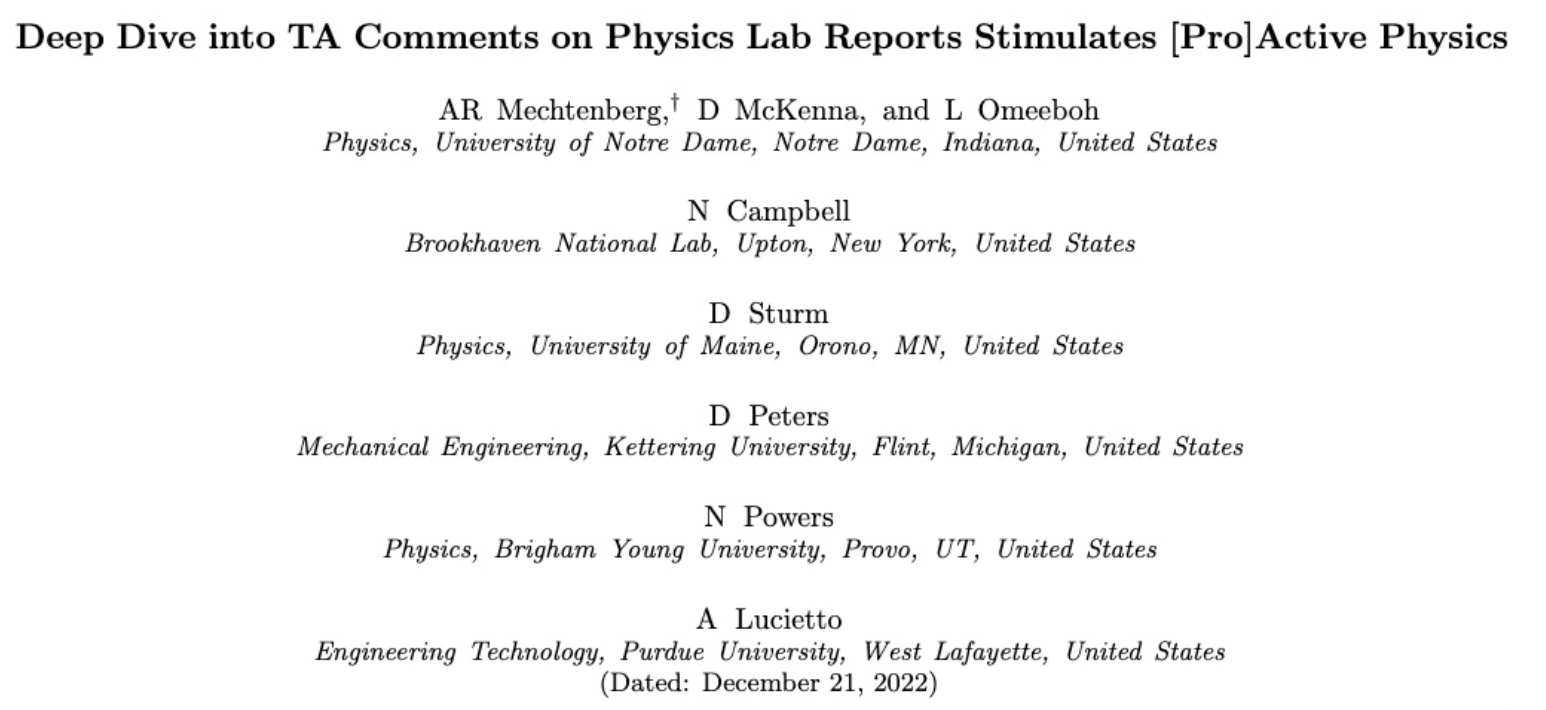

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 352 (delta 123), reused 137 (delta 53), pack-reused 113 (from 1)
Receiving objects: 100% (352/352), 39.70 MiB | 9.55 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [3]:
%cd APS-PRPER-ExD

!git pull

/content/APS-PRPER-ExD
Already up to date.


In [4]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [5]:
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

data_group4_df = pd.read_excel(path_to_colab / 'Paper_1/data_group4.xlsx', header = 0,sheet_name = 'Sheet1')
data_group4_np = data_group4_df.to_numpy()

#print(data_group4_df)

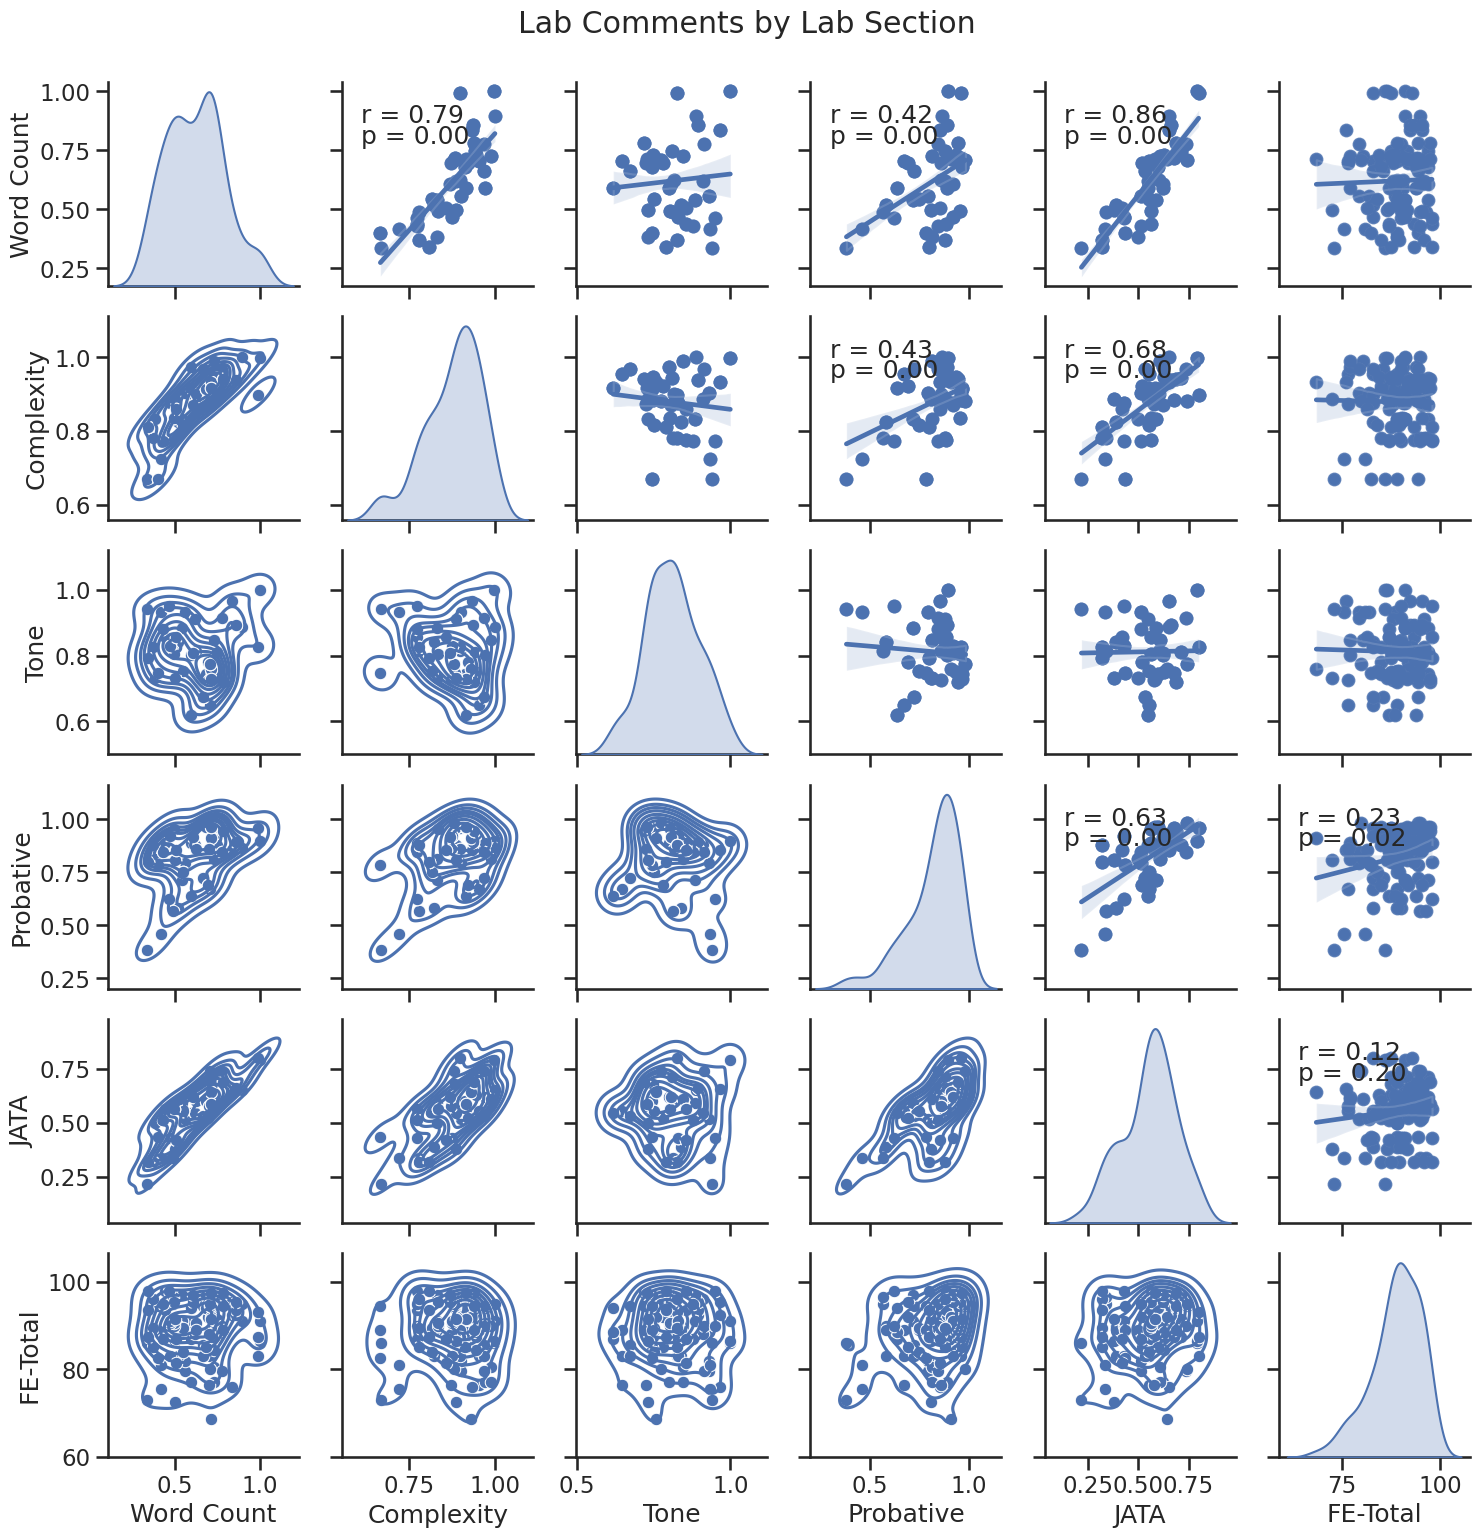

In [6]:
sns.set_context('talk')

FE_matrix = data_group3_df[['Word Count','Complexity','Tone','Probative','JATA','FE-Total']]

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    if p < 0.2:
      ax = plt.gca()
      ax.annotate("r = {:.2f}".format(r), xy=(0.1, .8), xycoords=ax.transAxes)
      ax.annotate("p = {:.2f}".format(p), xy=(0.1, .7), xycoords=ax.transAxes)
    else:
      return()

g = sns.pairplot(FE_matrix[['Word Count','Complexity','Tone','Probative','JATA','FE-Total']], diag_kind="kde")
g.fig.suptitle('Lab Comments by Lab Section', y=1.03)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_upper(corrfunc)
#

plt.savefig('Potentially_Predicting_FE-Total.png')

     C+S+TA  FE-Total      Tone  Word Count  Complexity  Probative      JATA
0       112      91.0  1.000000    1.000000    0.997639   0.896104  0.792208
1       112      86.0  1.000000    1.000000    0.997639   0.896104  0.792208
2       112      86.5  1.000000    1.000000    0.997639   0.896104  0.792208
3       111      76.5  0.649109    0.705311    0.953645   0.673267  0.554455
4       111      89.0  0.649109    0.705311    0.953645   0.673267  0.554455
..      ...       ...       ...         ...         ...        ...       ...
106     131      87.5  0.792000    0.338739    0.809545   0.800000  0.320000
107     131      98.0  0.792000    0.338739    0.809545   0.800000  0.320000
108     131      93.5  0.792000    0.338739    0.809545   0.800000  0.320000
109     133      81.5  0.856842    0.506246    0.859151   0.855263  0.421053
110     133      87.0  0.856842    0.506246    0.859151   0.855263  0.421053

[111 rows x 7 columns]
TA & FE-Total


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

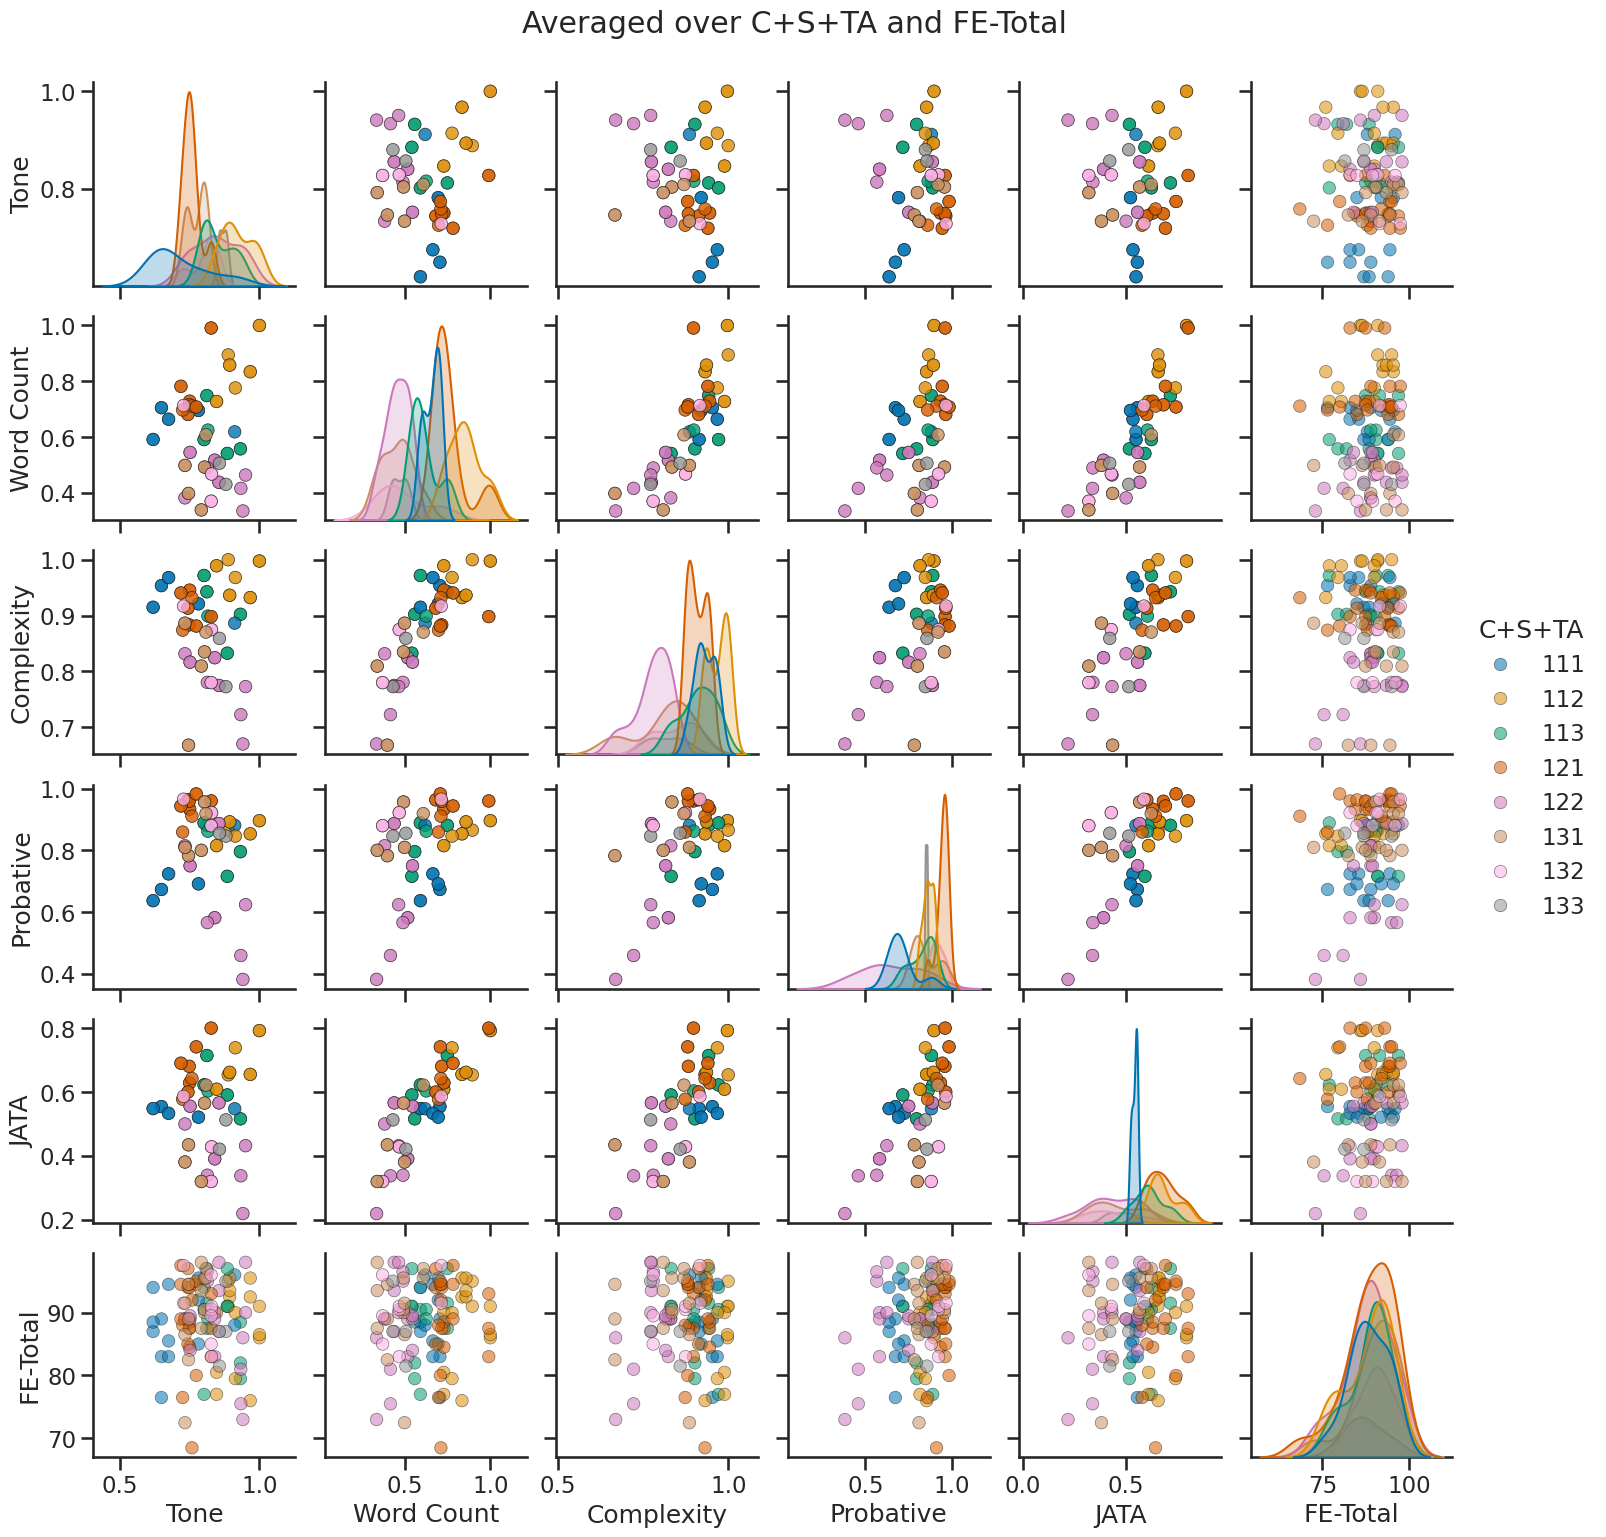

In [7]:
sns.set_context('talk')

LN_TA_avg_3 = data_group3_df
print(LN_TA_avg_3)
print("TA & FE-Total")
LN_TA_avg_3 = LN_TA_avg_3.reset_index()
LN_TA_avg_3 = LN_TA_avg_3[['C+S+TA', 'Tone','Word Count','Complexity','Probative','JATA','FE-Total']]

g = sns.pairplot(data=LN_TA_avg_3, hue='C+S+TA', plot_kws=dict(alpha=0.55, edgecolor="k", linewidth=0.5), palette=sns.color_palette('colorblind', 22))

# Done - change color map maybe but not now choices here: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
# subplots with pairplot in center with individual total histograms on outside as jointplot on outside
# then add colorbar as legend for TAs instead of legend with dots for TAs
# then zoom on interesting matrix graphs and add jointplot next as sns.jointplot("total_bill", "tip", data=tips, kind='reg');
# g=sns.jointplot('Complexity Num', 'Probative Num', data=LN_TA, kind='reg');

#sns.kdeplot(data[col], shade=True)
g.fig.suptitle('Averaged over C+S+TA and FE-Total', y=1.03)

plt.savefig('TA_FE-Total.png')

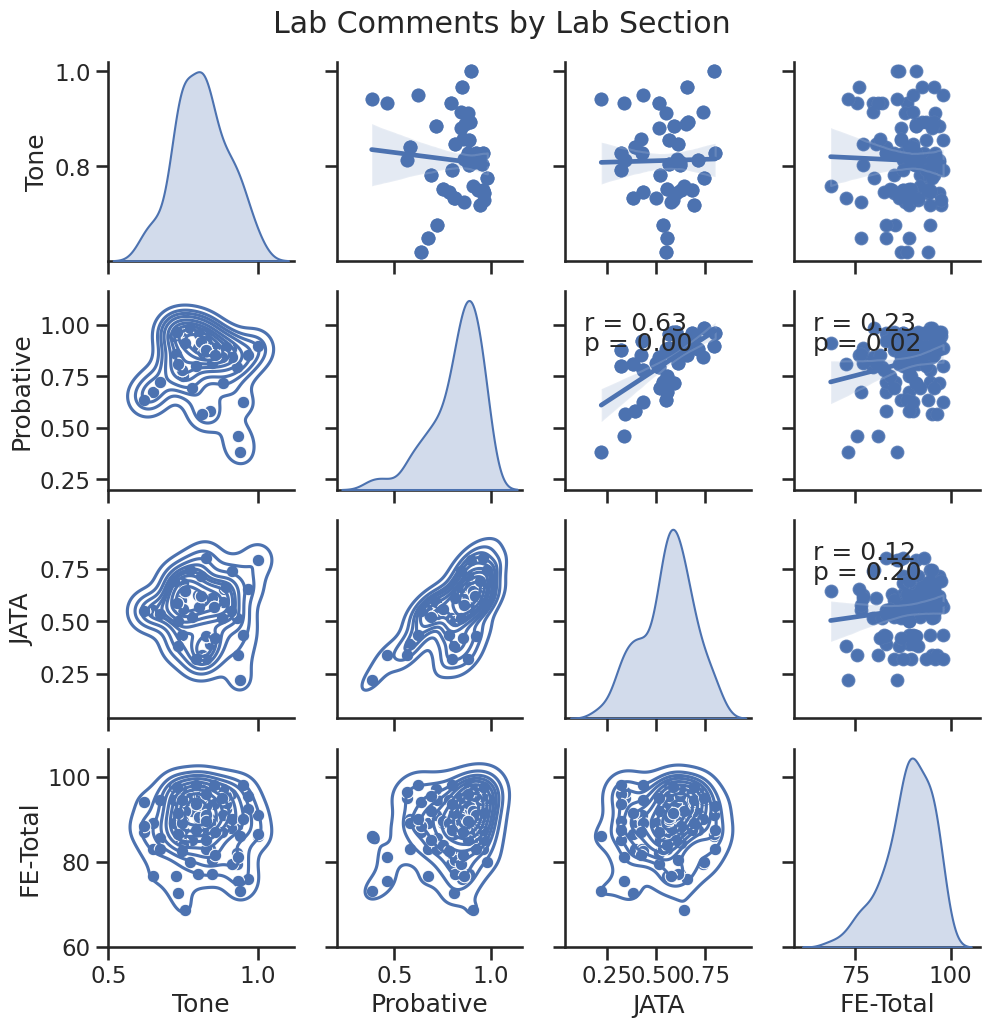

In [8]:
sns.set_context('talk')

FE_matrix_2 = data_group3_df[['Tone','Probative','JATA','FE-Total']]

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    if p < 0.2:
      ax = plt.gca()
      ax.annotate("r = {:.2f}".format(r), xy=(0.1, .8), xycoords=ax.transAxes)
      ax.annotate("p = {:.2f}".format(p), xy=(0.1, .7), xycoords=ax.transAxes)
    else:
      return()

g = sns.pairplot(FE_matrix_2[['Tone','Probative','JATA','FE-Total']], diag_kind="kde")
g.fig.suptitle('Lab Comments by Lab Section', y=1.03)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_upper(corrfunc)
#

plt.savefig('Potentially_Predicting_FE-Total.png')

     C+S+TA  FE-Total      Tone  Word Count  Complexity  Probative      JATA
0       112      91.0  1.000000    1.000000    0.997639   0.896104  0.792208
1       112      86.0  1.000000    1.000000    0.997639   0.896104  0.792208
2       112      86.5  1.000000    1.000000    0.997639   0.896104  0.792208
3       111      76.5  0.649109    0.705311    0.953645   0.673267  0.554455
4       111      89.0  0.649109    0.705311    0.953645   0.673267  0.554455
..      ...       ...       ...         ...         ...        ...       ...
106     131      87.5  0.792000    0.338739    0.809545   0.800000  0.320000
107     131      98.0  0.792000    0.338739    0.809545   0.800000  0.320000
108     131      93.5  0.792000    0.338739    0.809545   0.800000  0.320000
109     133      81.5  0.856842    0.506246    0.859151   0.855263  0.421053
110     133      87.0  0.856842    0.506246    0.859151   0.855263  0.421053

[111 rows x 7 columns]
TA & FE-Total


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (22) than needed (8), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/

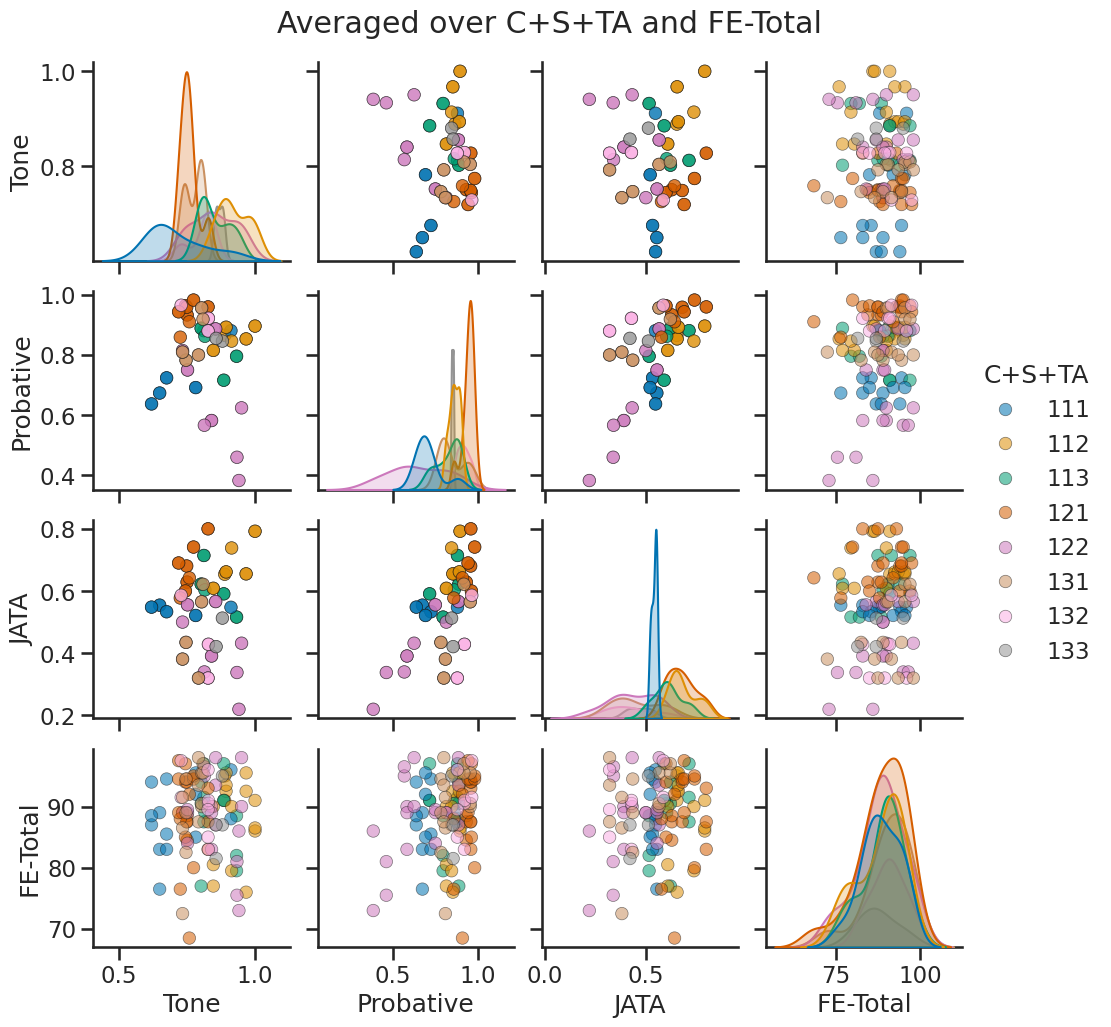

In [9]:
sns.set_context('talk')

LN_TA_avg_3 = data_group3_df
print(LN_TA_avg_3)
print("TA & FE-Total")
LN_TA_avg_3 = LN_TA_avg_3.reset_index()
LN_TA_avg_3 = LN_TA_avg_3[['C+S+TA', 'Tone','Probative','JATA','FE-Total']]

g = sns.pairplot(data=LN_TA_avg_3, hue='C+S+TA', plot_kws=dict(alpha=0.55, edgecolor="k", linewidth=0.5), palette=sns.color_palette('colorblind', 22))

# Done - change color map maybe but not now choices here: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
# subplots with pairplot in center with individual total histograms on outside as jointplot on outside
# then add colorbar as legend for TAs instead of legend with dots for TAs
# then zoom on interesting matrix graphs and add jointplot next as sns.jointplot("total_bill", "tip", data=tips, kind='reg');
# g=sns.jointplot('Complexity Num', 'Probative Num', data=LN_TA, kind='reg');

#sns.kdeplot(data[col], shade=True)
g.fig.suptitle('Averaged over C+S+TA and FE-Total', y=1.03)

plt.savefig('TA_FE-Total.png')